In [205]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import matplotlib.cm as cm
from utils import *
from compare import compare
import numpy as np
import heapq



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [211]:
test_labels = loadLabels("data/test_labels/", 1000)
print("labels of {} images loaded".format(str(len(test_labels))))
print('first data:')
print(test_labels[0])

top_n = 100
top_n_list = [(0,-1)]
for u, label in enumerate(test_labels):
    n_peaks = len(label)
    if n_peaks > top_n_list[0][0]:
        heapq.heappush( top_n_list, (n_peaks,u) )
    if len(top_n_list) > top_n:
        heapq.heappop(top_n_list)
print("top list with most peak labels")
print(top_n_list)

labels of 1000 images loaded
first data:
[(213, 173), (207, 177), (20, 180), (361, 183), (151, 192), (114, 212), (19, 263), (162, 265), (286, 286), (255, 322), (92, 335), (20, 340), (91, 352), (145, 353), (453, 23), (611, 64), (519, 118), (483, 194), (400, 229), (743, 236), (453, 244), (678, 273), (442, 283), (427, 291), (487, 360), (464, 362), (828, 208), (837, 274), (1057, 298), (841, 305), (1142, 613), (1295, 84), (1330, 157), (1170, 223), (1326, 232), (1404, 233), (1333, 249), (1337, 275), (1186, 285), (1224, 338), (1483, 1389), (1477, 1442)]
top list with most peak labels
[(147, 354), (147, 469), (149, 781), (148, 533), (148, 440), (151, 459), (151, 830), (151, 503), (159, 524), (158, 742), (156, 496), (151, 718), (162, 462), (160, 331), (161, 724), (182, 376), (154, 98), (169, 72), (171, 471), (164, 8), (175, 920), (197, 470), (159, 124), (159, 113), (157, 928), (179, 951), (177, 785), (173, 647), (184, 334), (164, 289), (231, 541), (246, 62), (271, 64), (170, 478), (230, 403), (

In [199]:
resultPath = "data/test_results/"
arch = "newpeaksv5"

thresh = 0.25
pre_vs_sen = {}

print("******************************************")
print("*****       testing " + arch)
print("******************************************")
test_results = loadResults(resultPath+arch+".json")
print("results of {} images loaded".format(str(len(test_results))))
print('first data has {} objects'.format(str(len(test_results[0]))))



******************************************
*****       testing newpeaksv5
******************************************
data/test_results/newpeaksv5.json
results of 1000 images loaded
first data has 256 objects


img min 0.0
img max 1.0


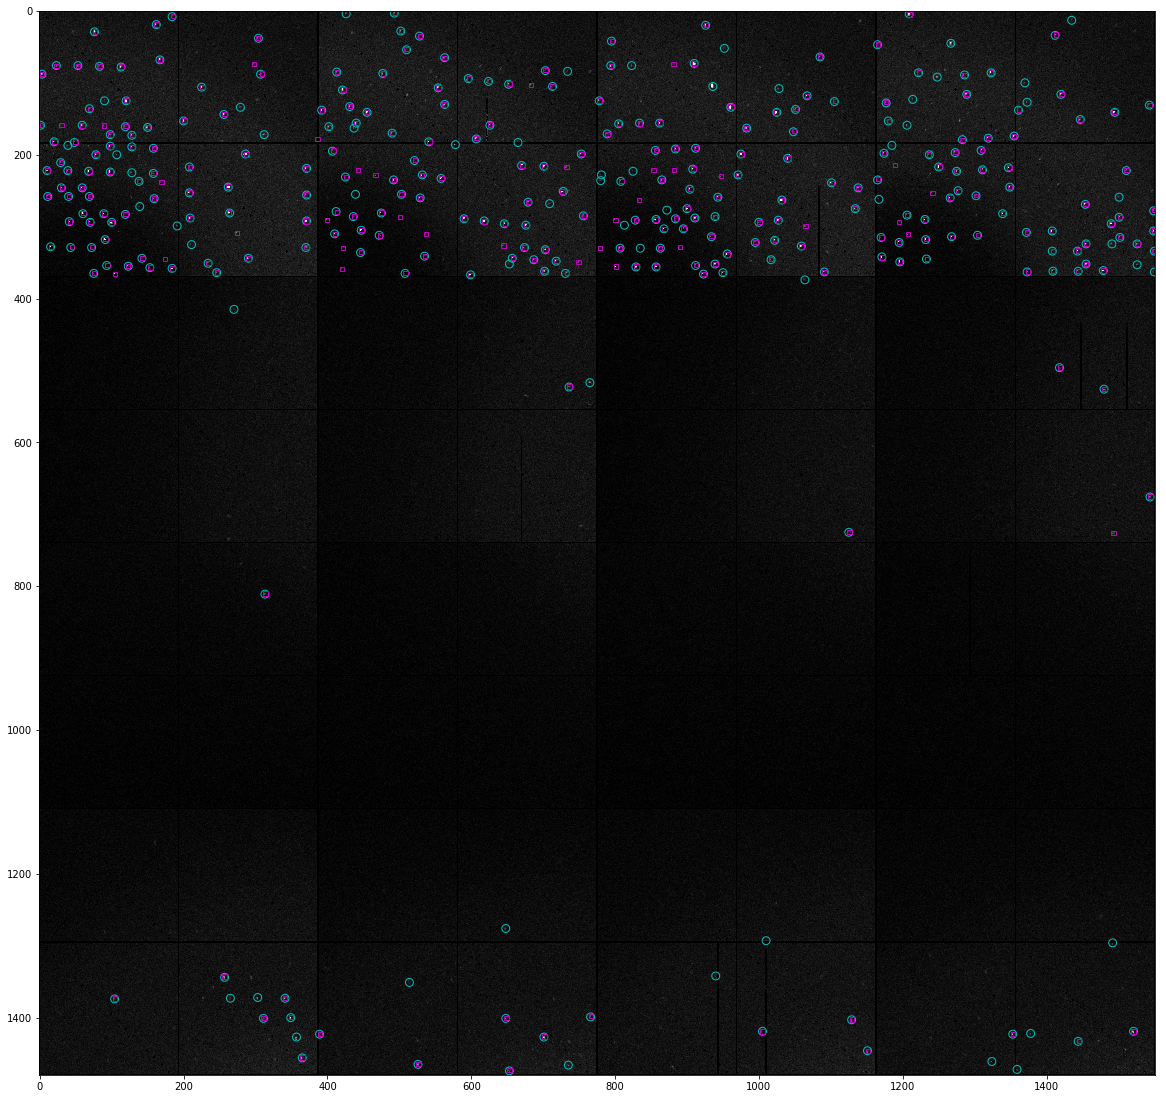

In [219]:
dataset = "test"
img_id = 344
box_size = 11
thresh = 0.25

img_filename = "data/" + dataset + "_" + str(img_id).zfill(6) + ".png"

img = plt.imread(img_filename)
print("img min", np.min(img))
print("img max", np.max(img))
x1 = -1748/2.0 + 3
y1 = -1739/2.0 - 8
x2 = x1 + img.shape[1] - 1
y2 = y1 + img.shape[0] - 1

t_test_labels = test_labels[img_id]
t_test_results = test_results[img_id]

fig, ax = plt.subplots(1)
im0 = plt.imshow(img, vmin=0, vmax=0.5, cmap=cm.gray)
for x, y in t_test_labels:
#     plt.plot( x+1, y+1, marker='o', color='c', fillstyle='none', linewidth=0.1 )
    circ = pat.Circle( (x, y),
        0.5*box_size, color="c", fill=False, linewidth=1)
    ax.add_patch(circ)
for xy in t_test_results:
    if xy["score"] < thresh:
        continue
    x, y = xy["bbox"][0:2]
    w, h = xy["bbox"][2:4]
    #     plt.plot( x+2, y+2, marker='s', color='m', fillstyle='none', linewidth=0.1 )
    rect = pat.Rectangle( (x, y),
        w, h, color="m", fill=False, linewidth=1)
    ax.add_patch(rect)

ax.set_aspect('equal')
fig.set_size_inches(20, 20)

img min 0.0
img max 1.0
number of labelled peaks on the image 325
number of converted peaks on the image 325
number of detected peaks on the image 305


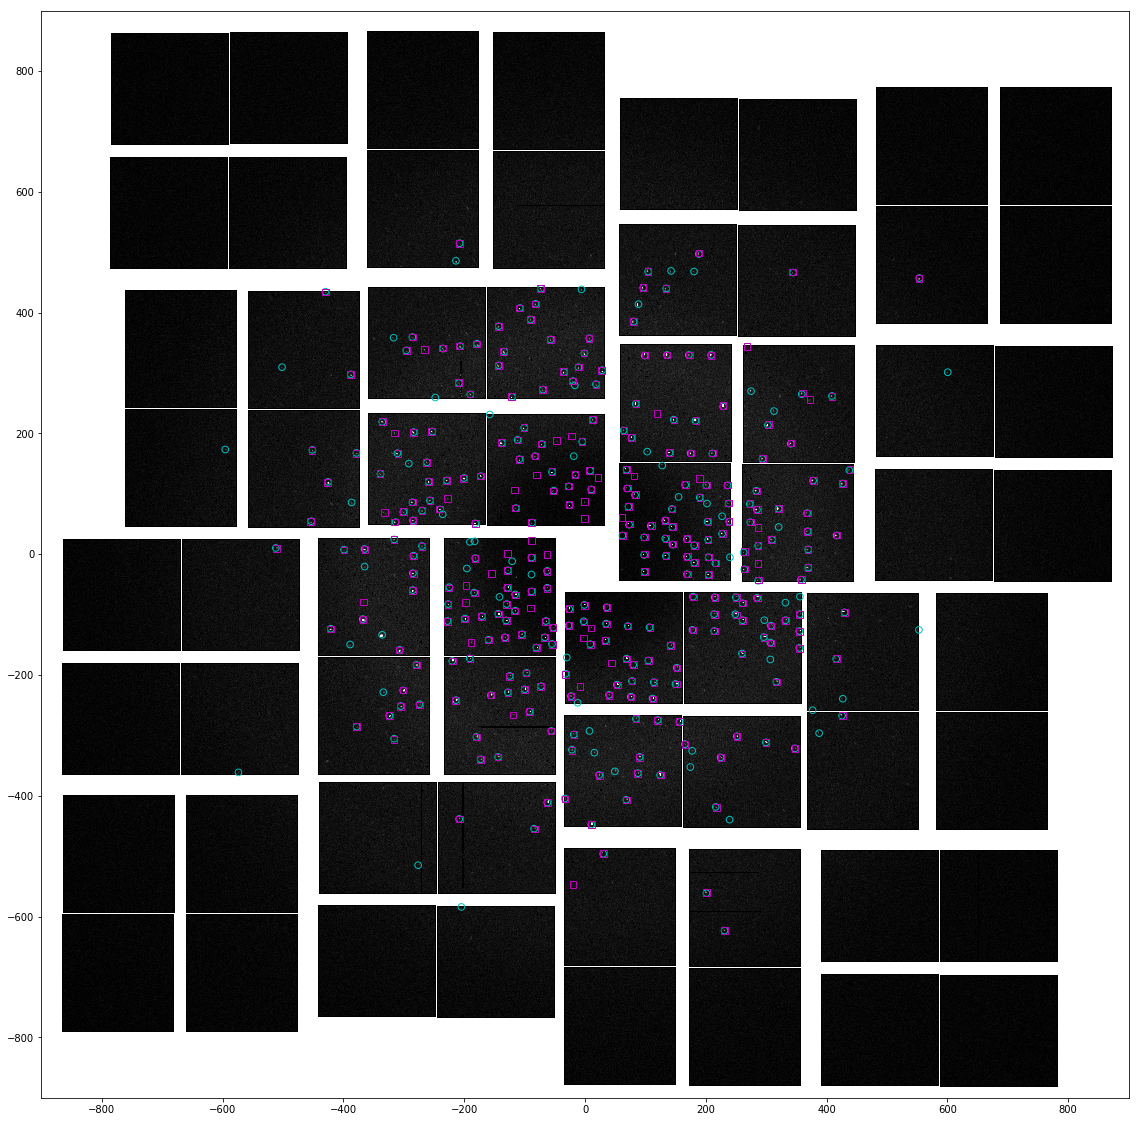

In [224]:
dataset = "test"
img_id = 344
thresh = 0.25
box_size = 11


img_filename = "data/" + dataset + "_" + str(img_id).zfill(6) + ".png"

img = plt.imread(img_filename)
print("img min", np.min(img))
print("img max", np.max(img))

asics = drawAsic( stream_data, img)

stream_data = readStream("data/.temp.stream")
t_test_labels = cheetah2Det( stream_data, test_labels[img_id] )
print("number of labelled peaks on the image", len(test_labels[img_id] ))
print("number of converted peaks on the image", len(test_labels[img_id] ))
# print( test_results[img_id] )
t_test_results = cheetah2Det( stream_data, test_results[img_id], thresh )
print("number of detected peaks on the image", len(t_test_results ))

fig, ax = plt.subplots(1)
for asic in asics[:]:
    plt.imshow(asic["img"], vmin=0, vmax=0.5, cmap=cm.gray, extent=asic["extend"])
for x, y in t_test_labels:
#     plt.plot( x+1, y+1, marker='o', color='c', fillstyle='none', linewidth=0.1 )
    circ = pat.Circle( (x, y),
        0.5*box_size, color="c", fill=False, linewidth=1)
    ax.add_patch(circ)
for x, y in t_test_results:
    rect = pat.Rectangle( (x-0.5*box_size, y-0.5*box_size),
        box_size, box_size, color="m", fill=False, linewidth=1)
    ax.add_patch(rect)
#     plt.plot( x, y, marker='s', color='m', fillstyle='none', linewidth=0.1 )
plt.xlim([-900, 900])
plt.ylim([-900, 900])
ax.set_aspect('equal')
fig.set_size_inches(20, 20)

In [ ]:
dataset = "test"
img_id = 344


img_filename = "data/" + dataset + "_" + str(img_id).zfill(6) + ".npy"
img = np.load(img_filename)

x1 = -1748/2.0 + 3
y1 = -1739/2.0 - 8
x2 = x1 + img.shape[1] - 1
y2 = y1 + img.shape[0] - 1

stream_data = readStream("data/.temp.stream")
t_test_labels = cheetah2Det( stream_data, test_labels[img_id] )
print("number of labelled peaks on the image", len(test_labels[img_id] ))
print("number of converted peaks on the image", len(test_labels[img_id] ))
# print( test_results[img_id] )
t_test_results = cheetah2Det( stream_data, test_results[img_id], 0.4 )
print("number of detected peaks on the image", len(t_test_results ))

fig, ax = plt.subplots(1)
im0 = plt.imshow(np.flipud(np.rot90(img,3)), vmin=0, vmax=2500, cmap=cm.gray,
                extent=[x1, x2, y1, y2])
for x, y in t_test_labels:
    plt.plot( y, x, marker='s', color='c', fillstyle='none', linewidth=0.1 )
for x, y in t_test_results:
    plt.plot( x, y, marker='s', color='m', fillstyle='none', linewidth=0.1 )
ax.set_aspect('equal')
fig.set_size_inches(20, 20)